# **NLP BASIC**

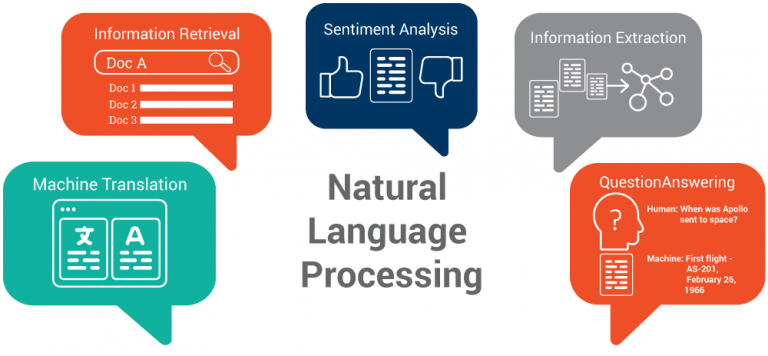

**Natural language processing (NLP)** refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.

In [2]:
#all the required laibraries 
import heapq
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize #create tkon based on word and sentence
from nltk.probability import FreqDist
from collections import defaultdict
from heapq import nlargest
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# **Tokenization**

**Tokenization** is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens

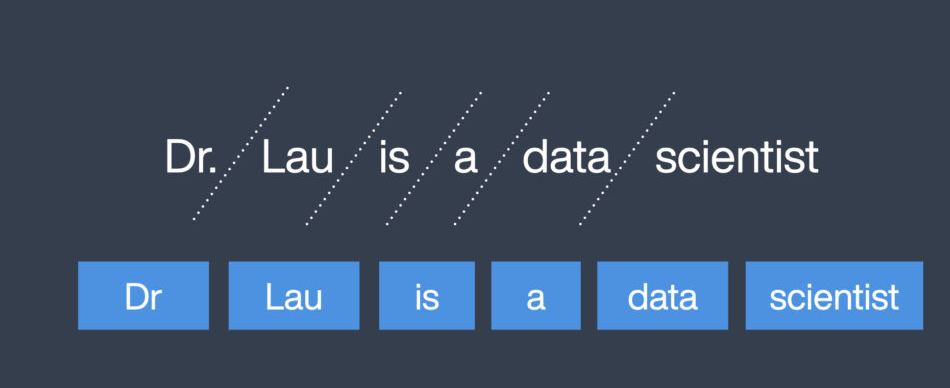

In [ ]:
etext="hi my name is Ebtesam Ali. Data scince and analysis student"
artext="أهلا أنا اسمي ابتسام. طالبة علوم وتحليل بيانات"
# the tokinez can be word or sentence 
#sentence tokenz split after (.)
esent=sent_tokenize(etext)
eword=word_tokenize(etext)
arsent=sent_tokenize(artext)
arword=word_tokenize(artext)

print(esent,"\n",eword,"\n",arsent,"\n",arsent)

['hi my name is Ebtesam Ali.', 'Data scince and analysis student'] 
 ['hi', 'my', 'name', 'is', 'Ebtesam', 'Ali', '.', 'Data', 'scince', 'and', 'analysis', 'student'] 
 ['أهلا أنا اسمي ابتسام.', 'طالبة علوم وتحليل بيانات'] 
 ['أهلا أنا اسمي ابتسام.', 'طالبة علوم وتحليل بيانات']


In some cases, we need word tokens for each sentence separately

In [ ]:
#list of word in each sentence separately
words_each_sent=[word_tokenize(sent) for sent in esent]
print(words_each_sent)

[['hi', 'my', 'name', 'is', 'Ebtesam', 'Ali', '.'], ['Data', 'scince', 'and', 'analysis', 'student']]


# **Stop world**

**Stop world**: Stop words are basically a set of commonly used words in any language, not just English.

The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead

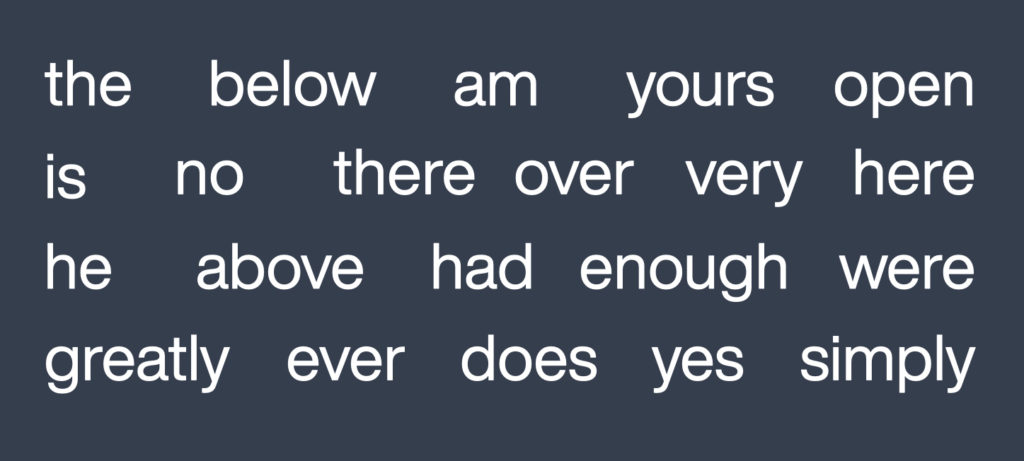

In [ ]:
from nltk.corpus import stopwords
from string import punctuation

In [ ]:
#first create a set of stop words and specify the desired languge (in our case it is english)
customstopword=set(stopwords.words('english'))
#remove the stop word by doing list for loop
wordWOstopWord=[word for word in word_tokenize(etext) if word not in customstopword ]
print(wordWOstopWord)

['hi', 'name', 'Ebtesam', 'Ali', '.', 'Data', 'scince', 'analysis', 'student']


# **n-grams**

**n-grams**: Some English words occur together more frequently. For example - Sky High, do or die, best performance, heavy rain etc. So, in a text document we may need to identify such pair of words which will help in sentiment analysis

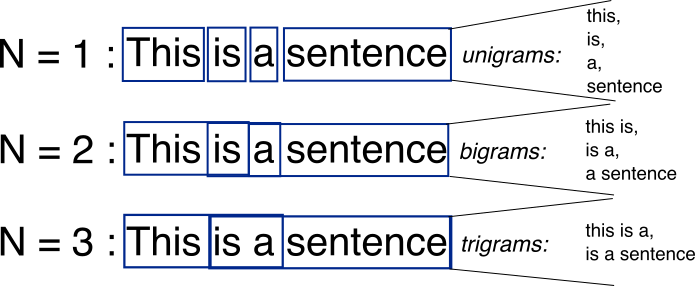

In [ ]:
from nltk.collections import * #words occure togther

In [ ]:
from nltk.collocations import BigramCollocationFinder
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(wordWOstopWord)#construct bigram from list of word
sorted(finder.ngram_fd.items())#use this function instesd of print function

[(('.', 'Data'), 1),
 (('Ali', '.'), 1),
 (('Data', 'scince'), 1),
 (('Ebtesam', 'Ali'), 1),
 (('analysis', 'student'), 1),
 (('hi', 'name'), 1),
 (('name', 'Ebtesam'), 1),
 (('scince', 'analysis'), 1)]

# **stemming**


**stemming**:Stemming is a natural language processing technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization!

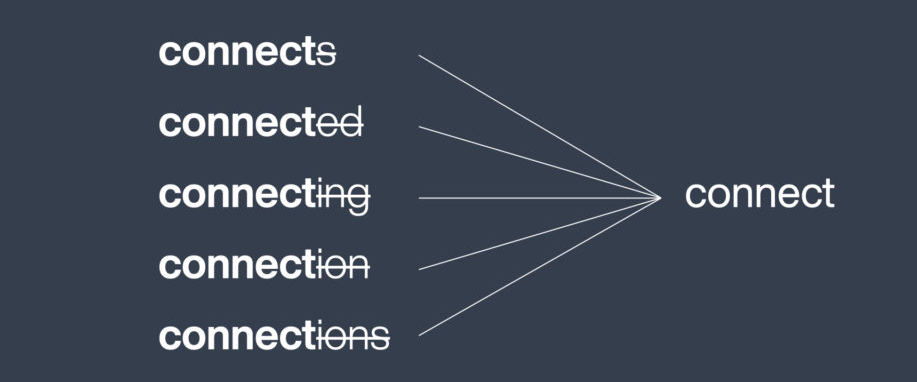

In [4]:
from nltk.stem.lancaster import LancasterStemmer
text2="Sara closed on closing night when she was in the mode to close"
st= LancasterStemmer()
#wordst is only varible in the for loop
stemWord=[st.stem(wordst.lower()) for wordst in word_tokenize(text2)]
print(stemWord)


['sar', 'clos', 'on', 'clos', 'night', 'when', 'she', 'was', 'in', 'the', 'mod', 'to', 'clos']


# **Part of speech tagging**

**Part of speech tagging**:is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context

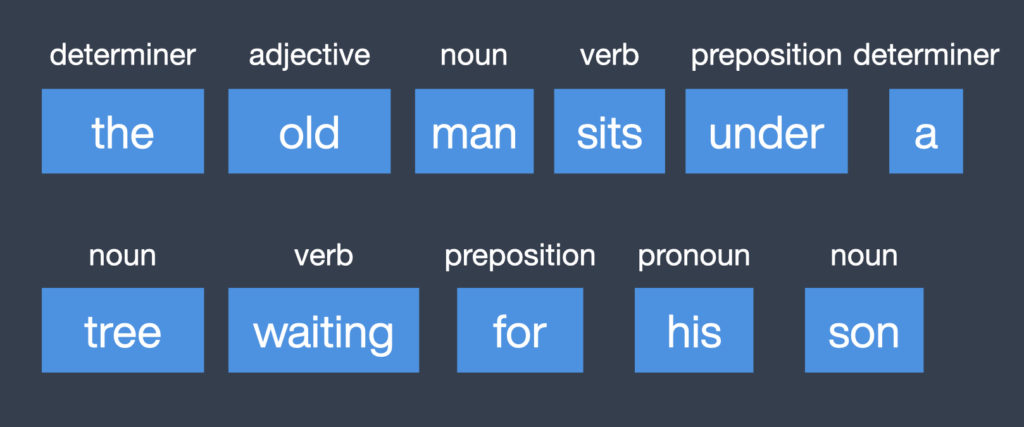

In [ ]:
#classify each word to crosspondnce part of speech
nltk.pos_tag(word_tokenize(text2))

[('Sara', 'NNP'),
 ('closed', 'VBD'),
 ('on', 'IN'),
 ('closing', 'NN'),
 ('night', 'NN'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('was', 'VBD'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mode', 'NN'),
 ('to', 'TO'),
 ('close', 'VB')]

# **word** **sense** **dissamguse**

**word** **sense** **dissamguse**: he ability to determine which meaning of word is activated by the use of word in a particular context

In [ ]:
from nltk.corpus import wordnet as wn 
for ss in wn.synsets("close"):
  print(ss,ss.definition)

Synset('stopping_point.n.01') <bound method Synset.definition of Synset('stopping_point.n.01')>
Synset('conclusion.n.08') <bound method Synset.definition of Synset('conclusion.n.08')>
Synset('finale.n.03') <bound method Synset.definition of Synset('finale.n.03')>
Synset('close.v.01') <bound method Synset.definition of Synset('close.v.01')>
Synset('close.v.02') <bound method Synset.definition of Synset('close.v.02')>
Synset('close_up.v.01') <bound method Synset.definition of Synset('close_up.v.01')>
Synset('close.v.04') <bound method Synset.definition of Synset('close.v.04')>
Synset('conclude.v.04') <bound method Synset.definition of Synset('conclude.v.04')>
Synset('close.v.06') <bound method Synset.definition of Synset('close.v.06')>
Synset('close.v.07') <bound method Synset.definition of Synset('close.v.07')>
Synset('close.v.08') <bound method Synset.definition of Synset('close.v.08')>
Synset('close.v.09') <bound method Synset.definition of Synset('close.v.09')>
Synset('close.v.10') <